# Object-Localisation with cascade classifier
Perform object localisation using a pretrained cascade classifier (.xml file) to detect one particular type of object.
The package use the original opencv detection method detectMultiScale3 to get the detection scores.  
Then the detections are filter with a overlap-based Non-Maxima Supression.

In [1]:
# Go to repo's root to import the package locally 
%cd ..

C:\Users\Laurent Thomas\Documents\github\haar-cascade


In [2]:
from haarcascade import Detector, __version__
print("haar-cascade-nms version:", __version__)

from skimage import io, img_as_ubyte # for image input and conversion
import matplotlib.pyplot as plt      # for display of results

haar-cascade-nms version: 1.1.0


In [4]:
dir(Detector)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'convert',
 'detectAndFilter',
 'detectMultiScale',
 'detectMultiScale2',
 'detectMultiScale3',
 'empty',
 'getFeatureType',
 'getOriginalWindowSize',
 'isOldFormatCascade',
 'load',
 'read']

## Step1: Load an image as 8-bit Grayscale for the detection with a cascade.

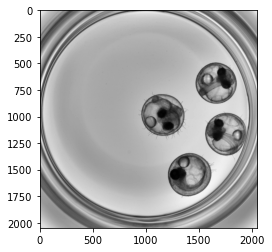

In [5]:
imgURL = r"https://zenodo.org/record/2650147/files/WE00049---E001--PO01--LO001--CO6--00000000_00.01.00_00.16.00%2C000.jpg"
img = io.imread(imgURL, as_gray=True)
img = img_as_ubyte(img)

plt.imshow(img, cmap="gray")

## Step2 : Load the trained cascade classifier which contain the information for the detection.  
The path `.\cascades\cascade.xml` assumes that the notebook is launched from a local copy of the repository, ie the active directory is the notebook directory and the trained cascade is in the subfolder above.  
In this case we load a cascade trained to recognised Medaka embryos in a well of a 96-well plate.

In [6]:
haar_cascade = Detector(r'.\cascade\cascade.xml')
print("Cascade classifier was correctly loaded : ", not haar_cascade.empty())

Cascade classifier was correctly loaded :  True


## Step3: Apply the detection (only if True was returned above)   
* __Option 1 : detectMultiScale3__  
It's the previously available method, it's kept here for test purpose as it is used internally by the new function signature `detectAndFilter`.

In [7]:
haar_cascade.detectMultiScale3?

In [10]:
bboxes, rejectLevel, levelWeights = haar_cascade.detectMultiScale3(img,
                                                           scaleFactor=1.1,
                                                           minNeighbors = 1,
                                                           minSize = (300, 300),
                                                           maxSize = (500, 500),
                                                           outputRejectLevels = True)

* __Option 2: detectAndFilter__   
This function provides a more intuitive signature with filtering of the detection using overlap.

In [7]:
haar_cascade.detectAndFilter?

In [8]:
if not haar_cascade.empty():
    bboxes, scores = haar_cascade.detectAndFilter(img,
                                    scaleFactor = 1.1,
                                    minSize = (300, 300),
                                    maxSize = (500, 500),
                                    score_threshold = 0.5,
                                    overlap_threshold = 0.4
                                    )
else:
    raise Exception("Issue loading the cascade classifier, make sure it is in the subfolder above")

print("Detected bounding boxes (x,y,w,h)")
print(bboxes)
print(scores)

Detected bounding boxes (x,y,w,h)
[[1446, 479, 425, 425], [1537, 967, 423, 423], [1179, 1367, 407, 407], [924, 769, 432, 432]]
[3.65239942073822, 1.9802459478378296, 1.9132969379425049, 1.779283881187439]


## Step4 : Visualize detections
The image is first converted to RGB for the plot.  
Then we plot the bounding boxes overlaid on the image, and we display the number of neighbor and confidence for each box.



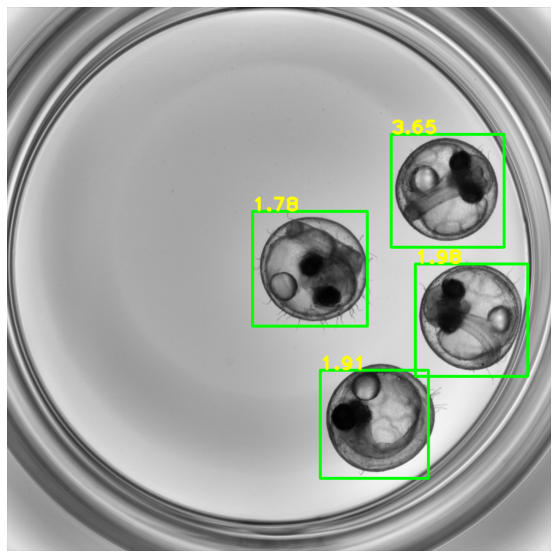

In [8]:
import cv2

imRGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for (x, y, w, h), confidence in zip(bboxes, scores):
    
        cv2.rectangle(imRGB,
                      (x, y),
                      (x+w, y+h),
                      color=(0, 255, 0),
                      thickness=10
                     )
        
        cv2.putText(imRGB, 
                    text="{:.2f}".format( confidence ), 
                    org=(x, y), 
                    fontFace=cv2.FONT_HERSHEY_PLAIN, 
                    thickness=10, 
                    fontScale=5, 
                    color=(255,255,0), 
                    lineType=cv2.LINE_AA) 

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(imRGB)